In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

In [2]:
import matplotlib
font = {'size' : 16}

matplotlib.rc('font', **font)

matplotlib.rcParams['mathtext.fontset'] = 'stix'
matplotlib.rcParams['font.family'] = 'STIXGeneral'

In [4]:
class Metrics: 
    def __init__(self, logs): 
        self.logs = logs 
        self.raw_metrics = self.calculate_metrics(logs)
        
    def extract_metrics(self, filename): 
        f = open(filename, 'r')
        lines = f.readlines() 
        gpu_usage = None
        gpu_mem = None
        for line in lines: 
            if "=> Average precision" in line: 
                accuracy = float(line.split(" ")[-1])
            if "=> Total training time" in line: 
                training_time = float(line.split(" ")[-2])
            if "GPU BEFORE EVALUATION:" in line: 
                gpu_usage, gpu_mem = eval(line[22:])
        return (accuracy, training_time, gpu_usage, gpu_mem)
    
    def calculate_metrics(self, files): 
        metrics = dict()

        for file in files: 
            iters, g_fc_uni, _ = file.split("_")
            iters = int(iters)
            g_fc_uni = int(g_fc_uni)
            if (iters, g_fc_uni) in metrics: 
                metrics[(iters, g_fc_uni)].append(self.extract_metrics(file))
            else: 
                metrics[(iters, g_fc_uni)] = [self.extract_metrics(file)] 

        return metrics
    
    def get_metrics_df(self): 
        rows = []
        for key in self.raw_metrics: 
            vals = self.raw_metrics[key]
            rows.append([key[0], key[1]] + [np.mean(x) for x in list(zip(*vals))])
        return pd.DataFrame(rows, columns=["iters", "g_fc_uni", "Accuracy", "Training time (s)", "GPU Usage (%)", "GPU Memory (MB)"])
            

# LGR Tuning Results

In [5]:
%cd ~/Desktop/research_project_repo/research_project/experiments/vgg_lgr_tuning/2021-04-29-11-52/

/Users/samuilstoychev/Desktop/research_project_repo/research_project/experiments/vgg_lgr_tuning/2021-04-29-11-52


In [6]:
a = !ls

In [7]:
m = Metrics(a)
df = m.get_metrics_df()
df

,iters,g_fc_uni,Accuracy,Training time (s),GPU Usage (%),GPU Memory (MB)
0,1000,1600,0.794633,537.666667,23.474299,354.000000
1,1000,200,0.754300,522.000000,20.179003,14.000000
2,1000,3200,0.847133,549.433333,27.023369,1504.000000
3,1000,400,0.804967,524.800000,21.748428,24.000000
4,1000,800,0.821467,522.533333,21.973149,138.000000
5,2000,1600,0.841967,1056.533333,24.042605,354.000000
6,2000,200,0.839133,1033.166667,21.250716,14.000000
7,2000,3200,0.851767,1114.266667,27.920676,1504.000000
8,2000,400,0.843533,1043.833333,21.368254,24.000000
9,2000,800,0.842433,1052.833333,22.003585,138.000000


## Accuracy 

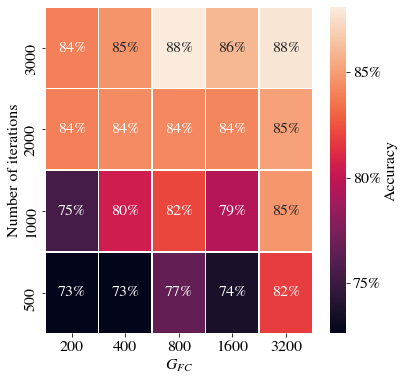

In [8]:
fig, ax = plt.subplots(figsize=(6, 6))         # Sample figsize in inches
sns.heatmap(df.pivot('iters','g_fc_uni','Accuracy'), annot=True, linewidths=.5, ax=ax, 
            cbar_kws={'label': 'Accuracy'}, fmt=".0%")

# Source for the code below: https://github.com/mwaskom/seaborn/issues/1773
b, t = plt.ylim() 
b += 0.5 
t -= 0.5 
plt.ylim(b, t) 
ax.invert_yaxis()

plt.xlabel("$G_{FC}$")
plt.ylabel("Number of iterations") 

cbar = ax.collections[0].colorbar
cbar.set_ticks([0.75, 0.8, 0.85, 0.90])
cbar.set_ticklabels(['75%', '80%', '85%', '90%'])

# plt.savefig("/Users/samuilstoychev/Desktop/dissertation_figures/lgr_tuning_acc.svg")

## GPU Memory Consumption

Text(29.625, 0.5, 'Number of iterations')

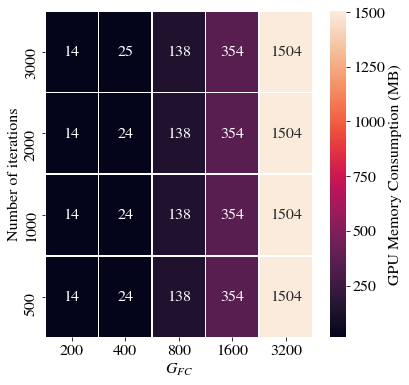

In [9]:
fig, ax = plt.subplots(figsize=(6, 6))         # Sample figsize in inches
sns.heatmap(df.pivot('iters','g_fc_uni','GPU Memory (MB)'), annot=True, linewidths=.5, ax=ax, 
            cbar_kws={'label': 'GPU Memory Consumption (MB)'}, fmt='.0f')

# Source for the code below: https://github.com/mwaskom/seaborn/issues/1773
b, t = plt.ylim() 
b += 0.5 
t -= 0.5 
plt.ylim(b, t) 
ax.invert_yaxis()
plt.xlabel("$G_{FC}$")
plt.ylabel("Number of iterations") 

# plt.savefig("/Users/samuilstoychev/Desktop/dissertation_figures/lgr_tuning_mem.svg")

## Average GPU Usage (%)

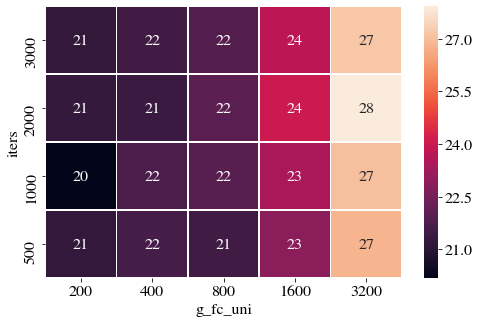

In [10]:
fig, ax = plt.subplots(figsize=(8, 5))         # Sample figsize in inches
sns.heatmap(df.pivot('iters','g_fc_uni','GPU Usage (%)'), annot=True, linewidths=.5, ax=ax)

# Source for the code below: https://github.com/mwaskom/seaborn/issues/1773
b, t = plt.ylim() 
b += 0.5 
t -= 0.5 
plt.ylim(b, t) 
ax.invert_yaxis()

plt.show() 